# **Applied AI Course Work Report**

This machine learning project focuses on colorizing grayscale (black-and-white) images using Generative Adversarial Networks (GANs). GANs employ an innovative technique inspired by Game Theory to generate realistic outputs. In this approach, the generator model follows a UNet-like architecture, incorporating skip connections to improve the quality of the generated images. This method allows the model to effectively learn the mapping from grayscale images to their corresponding colored versions, enhancing the visual appeal and practical applications of grayscale imagery.




#PART A
###Literature Review on Image Colorization Using GANs

####Introduction

Image colorization, the process of converting grayscale images into vivid color representations, is a prominent area in computer vision research. This field leverages advanced deep learning models such as Convolutional Neural Networks (CNNs) and Generative Adversarial Networks (GANs) to predict and reconstruct realistic color information. Recent advancements have focused on improving the quality and consistency of colorization through innovative techniques and loss functions.

##Techniques Used

* **Generative Adversarial Networks (GANs):** GANs are
widely used for producing realistic colorizations. By utilizing adversarial training between a generator and discriminator, these networks refine the colorization quality through feedback mechanisms that ensure the generated images are indistinguishable from real color images.

* **CycleGAN Framework:** Cycle-consistent GANs (CycleGAN) enable unpaired image-to-image translation, making them particularly effective for grayscale colorization tasks where paired datasets are unavailable. The use of two generators and discriminators ensures bidirectional transformations while maintaining content consistency.

* **Input Fusion Modules:** Advanced architectures incorporate input fusion modules that merge input condition maps with feature maps at multiple scales. This approach enhances the network's ability to predict color accurately by leveraging diverse spatial resolutions.

* **Loss Functions**: Diverse loss functions, including adversarial loss, cycle-consistency loss, and color distribution loss, are employed to ensure the realism and fidelity of the colorized images. Metrics like SSIM (Structural Similarity Index) and PSNR (Peak Signal-to-Noise Ratio) are used to evaluate the performance.

* **Convolutional Neural Networks (CNNs):** CNNs are crucial for extracting spatial hierarchies and learning mappings between grayscale and color domains. These networks excel in capturing fine-grained details, enabling precise and realistic colorization.

#Discussion

Three primary techniques dominate grayscale image colorization:

* GANs and CycleGANs are recognized for their ability to handle unpaired datasets, leveraging adversarial and cycle-consistency losses to produce visually coherent results.
* CNN-based Architectures with encoder-decoder structures are well-suited for tasks requiring spatial detail preservation.
* Custom Loss Functions play a pivotal role in improving the visual fidelity of colorized images by balancing pixel-level accuracy and perceptual realism.

Collectively, these approaches address the complexities of grayscale image colorization by integrating robust architectures, advanced loss mechanisms, and experimental validation across diverse datasets.

#References

* Ren, H. C. (2024). Enhancing Black-and-White Image Colorization Using Cycle GAN: A Study on Unpaired Image Translation. Applied and Computational Engineering, 103(1), 216-222. Available from: 10.54254/2755-2721/103/20241183

* Hobincă, R., & Ferariu, L. (2024). Colouring Grayscale Images Using Cycle-Generative-Adversarial Networks. IEEE Conference on Systems Theory, Control, and Computing, 101-106. Available from: 10.1109/icstcc62912.2024.10744742

* Akash, K., Akhil, L., Yalamanchili, P., et al. (2024). Black and White Image Colorization with Deep Learning. International Journal For Science Technology And Engineering, 12(6), 41-44. Available from: 10.22214/ijraset.2024.62950

#PART B

**Problem Domain:** Grayscale to Color Image Translation in Visual Computing

**Goal:**
The primary goal is to develop a robust system capable of accurately colorizing grayscale images, ensuring high visual fidelity and realistic color mapping. This system has potential applications in restoring old photographs, enhancing grayscale visual data, and supporting creative industries in generating visually appealing content.

##Strengths and Weaknesses

**Convolutional Neural Networks (CNNs)**

###Strengths

* Automatic Feature Extraction: CNNs automatically learn relevant spatial features directly from the grayscale images.
* High Performance: Demonstrates strong results in image processing tasks, including color mapping.
*Handling Complex Patterns: Capable of capturing intricate textures and details in grayscale images.
* Translation Invariance: Robust to positional changes in the input images

###Weaknesses

* Data Hungry: Requires large, annotated datasets for effective training.
* Computationally Expensive: Demands substantial * computational resources, particularly for deeper architectures.
* Overfitting Risk: Prone to overfitting, especially with limited training data.
* Interpretability Issues: It can be challenging to understand and interpret the decision-making process.

**Generative Adversarial Networks (GANs)**
###Strengths

* Realistic Output: GANs generate visually appealing and realistic colorized images.
* Effective with Unpaired Data: Particularly useful for training with unpaired grayscale and color datasets.
* Improved Image Quality: Adversarial training helps refine image details for better colorization results.
* Diverse Outputs: Capable of producing varied results, enabling creative flexibility.


###Weaknesses
* Training Instability: GANs are challenging to train and often require careful tuning.
* Mode Collapse: May generate limited variations, leading to repetitive outputs.
* Hyperparameter Sensitivity: Performance is highly dependent on choosing appropriate hyperparameters.
* Resource Intensive: Requires high computational power and memory for effective training.

**Encoder-Decoder Models (e.g., U-Net)**
###Strengths

* Effective Image Translation: Well-suited for tasks like grayscale to color image translation.
* Preserves Spatial Details: Skip connections in models like U-Net retain important structural information.
* Simplified Training: The straightforward input-output mapping facilitates training for specific tasks.

###Weaknesses

* Large Data Requirement: Requires extensive annotated datasets for training.
* Computational Demand: Deep architectures can be computationally intensive.
* Limited Complexity Handling: Struggles with highly intricate relationships in complex colorization tasks.
* Overfitting Risk: High risk of overfitting when trained on small datasets.

#PART C

##Dataset
The dataset contains .npy statistical images of both grayscale and colored scans which corresponds to each other. Here is a quick look on the dataset.


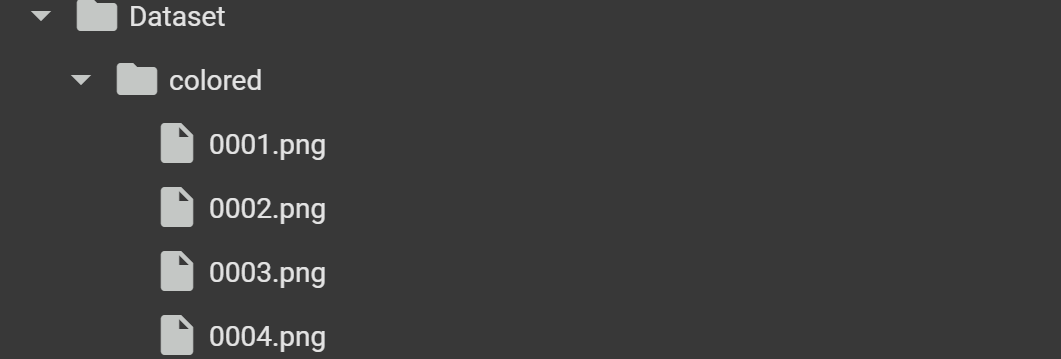

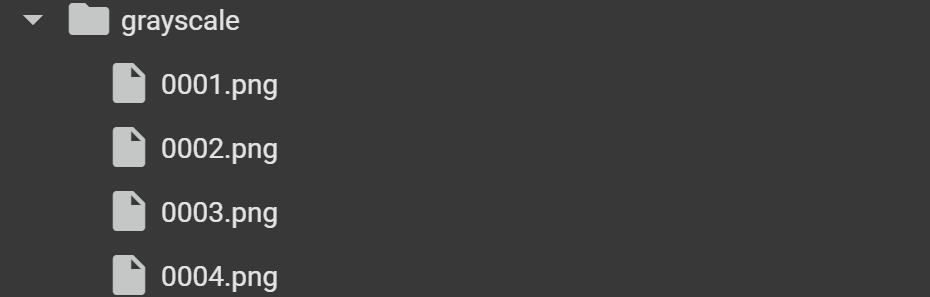


##High level Diagram
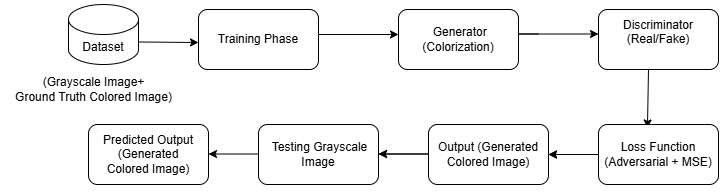

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



We'll now parse the images ( RGB images to be precise ) one by one, and transform each one to a grayscale image using PIL's `.convert( 'L' )` method. So our dataset will have samples of $( \ grayscale \ image \ , \ RGB \ image \ )$

We used only a part of our dataset, determined by `dataset_split` , as Colab's computational power would cease on providing a large number of images.


#Loading and Preparing the Dataset

1. Loading the Dataset:
The dataset consists of grayscale (input) and RGB (output) images. The images are loaded from a specific directory, resized, and split into arrays for grayscale and colored images. These arrays are then appended to lists (x for grayscale images and y for colored images).

2. Normalizing the Data:
Each image is normalized to the range [0, 1] by dividing the pixel values by 255. This ensures consistency in the data fed into the neural network, improving training stability.

3. Visualizing Data:
The first grayscale image and its corresponding colored image are visualized side by side to verify the dataset's integrity. This helps to confirm that the data is correctly aligned and formatted for training.

4. Inspecting Dataset Dimensions:
The shape of the grayscale and colored datasets is printed to confirm that both datasets have the same dimensions, ensuring compatibility during model training.

In [3]:
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
import os
from tensorflow import keras

# The batch size we'll use for training
batch_size = 64

# Size of the image required to train our model
img_size = 120

# These many images will be used from the data archive
dataset_split = 2500

master_dir = '/content/drive/MyDrive/ImageDataset'
x = []
y = []
for image_file in os.listdir( master_dir )[ 0 : dataset_split ]:
    rgb_image = Image.open( os.path.join( master_dir , image_file ) ).resize( ( img_size , img_size ) )
    # Normalize the RGB image array
    rgb_img_array = (np.asarray( rgb_image ) ) / 255
    gray_image = rgb_image.convert( 'L' )
    # Normalize the grayscale image array
    gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size , 1 ) ) ) / 255
    # Append both the image arrays
    x.append( gray_img_array )
    y.append( rgb_img_array )

# Train-test splitting
train_x, test_x, train_y, test_y = train_test_split( np.array(x) , np.array(y) , test_size=0.1 )

# Construct tf.data.Dataset object
dataset = tf.data.Dataset.from_tensor_slices( ( train_x , train_y ) )
dataset = dataset.batch( batch_size )


#Defining the GAN Model

**Generator Model:**
The generator model in the GAN architecture is responsible for colorizing grayscale images. It follows a U-Net-like encoder-decoder architecture consisting of several convolutional layers followed by transpose convolutional layers. The model is structured in three main stages:

**Encoder:**
The encoder consists of a series of convolutional layers (with increasing feature maps) that extract relevant features from the input grayscale image. These layers are followed by LeakyReLU activations to introduce non-linearity.

**Bottleneck:**
The bottleneck is a convolutional layer with a tanh activation function, which serves to combine the extracted features in the middle of the network.

**Decoder:**
The decoder performs upsampling through transpose convolutional layers to reconstruct the image to its original resolution. Skip connections are used to concatenate feature maps from the encoder to the corresponding decoder layer, ensuring detailed information is preserved during reconstruction.


##Generator Model:
The generator model in the GAN architecture is responsible for colorizing grayscale images. It follows a U-Net-like encoder-decoder architecture consisting of several convolutional layers followed by transpose convolutional layers. The model is structured in three main stages:

**Encoder:**
The encoder consists of a series of convolutional layers (with increasing feature maps) that extract relevant features from the input grayscale image. These layers are followed by LeakyReLU activations to introduce non-linearity.

**Bottleneck:**
The bottleneck is a convolutional layer with a tanh activation function, which serves to combine the extracted features in the middle of the network.

**Decoder:**
The decoder performs upsampling through transpose convolutional layers to reconstruct the image to its original resolution. Skip connections are used to concatenate feature maps from the encoder to the corresponding decoder layer, ensuring detailed information is preserved during reconstruction.


In [27]:
def get_generator_model():

    inputs = tf.keras.layers.Input( shape=( img_size , img_size , 1 ) )

    conv1 = tf.keras.layers.Conv2D( 16 , kernel_size=( 5 , 5 ) , strides=1 )( inputs )
    conv1 = tf.keras.layers.LeakyReLU()( conv1 )
    conv1 = tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1)( conv1 )
    conv1 = tf.keras.layers.LeakyReLU()( conv1 )
    conv1 = tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1)( conv1 )
    conv1 = tf.keras.layers.LeakyReLU()( conv1 )

    conv2 = tf.keras.layers.Conv2D( 32 , kernel_size=( 5 , 5 ) , strides=1)( conv1 )
    conv2 = tf.keras.layers.LeakyReLU()( conv2 )
    conv2 = tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 )( conv2 )
    conv2 = tf.keras.layers.LeakyReLU()( conv2 )
    conv2 = tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 )( conv2 )
    conv2 = tf.keras.layers.LeakyReLU()( conv2 )

    conv3 = tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 )( conv2 )
    conv3 = tf.keras.layers.LeakyReLU()( conv3 )
    conv3 = tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 )( conv3 )
    conv3 = tf.keras.layers.LeakyReLU()( conv3 )
    conv3 = tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 )( conv3 )
    conv3 = tf.keras.layers.LeakyReLU()( conv3 )

    bottleneck = tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='tanh' , padding='same' )( conv3 )

    concat_1 = tf.keras.layers.Concatenate()( [ bottleneck , conv3 ] )
    conv_up_3 = tf.keras.layers.Conv2DTranspose( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' )( concat_1 )
    conv_up_3 = tf.keras.layers.Conv2DTranspose( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' )( conv_up_3 )
    conv_up_3 = tf.keras.layers.Conv2DTranspose( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' )( conv_up_3 )

    concat_2 = tf.keras.layers.Concatenate()( [ conv_up_3 , conv2 ] )
    conv_up_2 = tf.keras.layers.Conv2DTranspose( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' )( concat_2 )
    conv_up_2 = tf.keras.layers.Conv2DTranspose( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' )( conv_up_2 )
    conv_up_2 = tf.keras.layers.Conv2DTranspose( 32 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' )( conv_up_2 )

    concat_3 = tf.keras.layers.Concatenate()( [ conv_up_2 , conv1 ] )
    conv_up_1 = tf.keras.layers.Conv2DTranspose( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu')( concat_3 )
    conv_up_1 = tf.keras.layers.Conv2DTranspose( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu')( conv_up_1 )
    conv_up_1 = tf.keras.layers.Conv2DTranspose( 3 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu')( conv_up_1 )

    model = tf.keras.models.Model( inputs , conv_up_1 )
    return model


##Discriminator Model:

The discriminator model in the GAN architecture is a standard convolutional neural network (CNN) designed to distinguish between real and generated images. It uses several convolutional layers followed by max-pooling operations to extract features. The final dense layers classify whether the input image is real or fake (generated). The output is a single probability score (0 or 1), indicating the authenticity of the image.


In [28]:
def get_discriminator_model():
    layers = [
        tf.keras.layers.Conv2D( 32 , kernel_size=( 7 , 7 ) , strides=1 , activation='relu' , input_shape=( 120 , 120 , 3 ) ),
        tf.keras.layers.Conv2D( 32 , kernel_size=( 7, 7 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense( 512, activation='relu'  )  ,
        tf.keras.layers.Dense( 128 , activation='relu' ) ,
        tf.keras.layers.Dense( 16 , activation='relu' ) ,
        tf.keras.layers.Dense( 1 , activation='sigmoid' )
    ]
    model = tf.keras.models.Sequential( layers )
    return model


#Compiling the GAN Model
##1. Loss Functions:
The generator and discriminator in the GAN model use different loss functions:

Discriminator Loss:
The discriminator is trained using binary cross-entropy loss. It tries to minimize the error in distinguishing between real and generated images. Random noise is added to the labels (tf.random.uniform) to improve the discriminator’s robustness.

Generator Loss:
The generator is trained using mean squared error (MSE) loss between the predicted output and the real colored image (ground truth). This measures the difference between the generated and real images, encouraging the generator to create realistic images.

##2. Optimizers:
Both the generator and the discriminator use the Adam optimizer with a learning rate of 0.0005. Adam is chosen for its adaptive learning rate capabilities, which helps in stabilizing the training of GANs.

In [29]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()
mse = tf.keras.losses.MeanSquaredError()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) - tf.random.uniform( shape=real_output.shape , maxval=0.1 ) , real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) + tf.random.uniform( shape=fake_output.shape , maxval=0.1  ) , fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output , real_y):
    real_y = tf.cast( real_y , 'float32' )
    return mse( fake_output , real_y )

generator_optimizer = tf.keras.optimizers.Adam( 0.0005 )
discriminator_optimizer = tf.keras.optimizers.Adam( 0.0005 )

generator = get_generator_model()
discriminator = get_discriminator_model()


#Preparing the Dataset for GAN Training
###1. Loading and Preprocessing the Data:
The dataset is loaded, and images are resized to a fixed size (120x120) and normalized to a range of [0, 1] to ensure consistency during training.

The dataset includes grayscale images (input_x) as inputs for the generator, and their corresponding colored (RGB) images (real_y) as ground truth.
###2. Training Step:
The train_step function defines one training iteration. During each step:

The generator (G) generates a colored image (generated_images) from the grayscale image (input_x).

The discriminator (D) evaluates both the real colored image (real_y) and the generated image (generated_images), determining if they are real or fake.

Losses are computed:

Generator Loss: The difference between the generated image and the real colored image (real_y).
Discriminator Loss: The difference between the discriminator's predictions for the real and generated images.
Gradients are calculated for both the generator and discriminator using GradientTape in TensorFlow, then applied to update the model parameters.


In [30]:
@tf.function
def train_step(input_x, real_y):
    real_y = real_y[..., :3]  # Ensure real_y has 3 channels (RGB)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate an image -> G(x)
        generated_images = generator(input_x, training=True)
        # Probability that the given image is real -> D(x)
        real_output = discriminator(real_y, training=True)
        # Probability that the given image is the one generated -> D(G(x))
        generated_output = discriminator(generated_images, training=True)

        # Compute losses
        gen_loss = generator_loss(generated_images, real_y)
        disc_loss = discriminator_loss(real_output, generated_output)

    # Compute gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Apply gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))




###3. Training Loop:
The training loop runs for a specified number of epochs (num_epochs). Each epoch iterates over the training dataset in batches, and for each batch, the train_step function is called.

The dataset is loaded using TensorFlow’s tf.data.Dataset API, which batches the images into manageable chunks (batch_size = 64).
Each batch contains pairs of grayscale (input_x) and colored images (real_y), which are used during the training process.

In [31]:
num_epochs = 100

for e in range( num_epochs ):
    print( e )
    for ( x , y ) in dataset:
        # Here ( x , y ) represents a batch from our training dataset.
        print( x.shape )
        train_step( x , y )



0
(40, 120, 120, 1)
1
(40, 120, 120, 1)
2
(40, 120, 120, 1)
3
(40, 120, 120, 1)
4
(40, 120, 120, 1)
5
(40, 120, 120, 1)
6
(40, 120, 120, 1)
7
(40, 120, 120, 1)
8
(40, 120, 120, 1)
9
(40, 120, 120, 1)
10
(40, 120, 120, 1)
11
(40, 120, 120, 1)
12
(40, 120, 120, 1)
13
(40, 120, 120, 1)
14
(40, 120, 120, 1)
15
(40, 120, 120, 1)
16
(40, 120, 120, 1)
17
(40, 120, 120, 1)
18
(40, 120, 120, 1)
19
(40, 120, 120, 1)
20
(40, 120, 120, 1)
21
(40, 120, 120, 1)
22
(40, 120, 120, 1)
23
(40, 120, 120, 1)
24
(40, 120, 120, 1)
25
(40, 120, 120, 1)
26
(40, 120, 120, 1)
27
(40, 120, 120, 1)
28
(40, 120, 120, 1)
29
(40, 120, 120, 1)
30
(40, 120, 120, 1)
31
(40, 120, 120, 1)
32
(40, 120, 120, 1)
33
(40, 120, 120, 1)
34
(40, 120, 120, 1)
35
(40, 120, 120, 1)
36
(40, 120, 120, 1)
37
(40, 120, 120, 1)
38
(40, 120, 120, 1)
39
(40, 120, 120, 1)
40
(40, 120, 120, 1)
41
(40, 120, 120, 1)
42
(40, 120, 120, 1)
43
(40, 120, 120, 1)
44
(40, 120, 120, 1)
45
(40, 120, 120, 1)
46
(40, 120, 120, 1)
47
(40, 120, 120, 1)
48

#PART D Software Testing
##Evaluating and Visualizing the GAN Model

###1. Testing:
The model is tested on the validation set to compute the **loss** and **Mean Squared Error (MSE)**. The output of the generator is compared with the ground truth images to evaluate the model's performance.

The following code computes the output from the generator and prints the shapes of the input and output:

In [32]:
y = generator( test_x[0 : ] ).numpy()
print("Input shape for generator:", test_x.shape)
print("Output shape from generator:", y.shape)
print("Ground truth shape:", test_y.shape)

Input shape for generator: (5, 120, 120, 1)
Output shape from generator: (5, 120, 120, 3)
Ground truth shape: (5, 120, 120, 3)


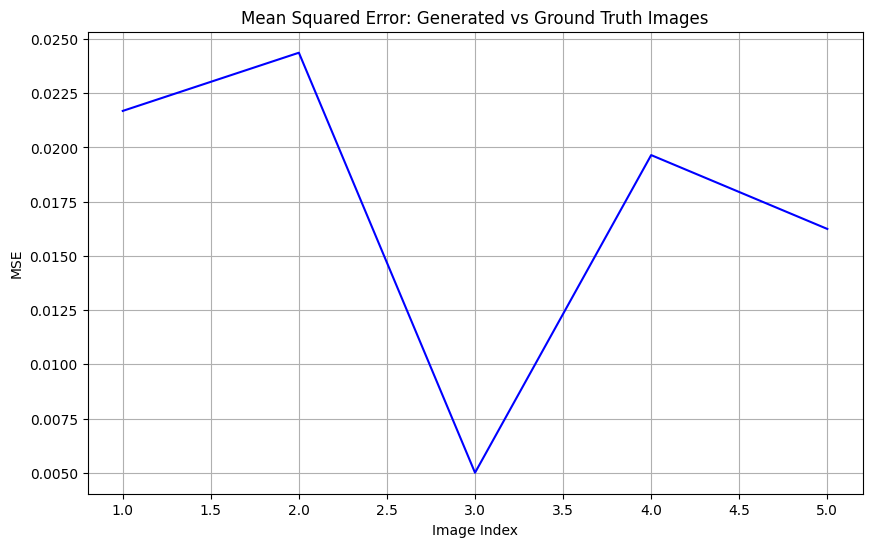

In [35]:
mse_values = []
for i in range(len(test_x)):
    mse = np.mean(np.square(y[i] - test_y[i]))
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, 'b-')
plt.title('Mean Squared Error: Generated vs Ground Truth Images')
plt.xlabel('Image Index')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

###2. Visual Comparison:
A visual comparison is made between the generated colorized images and the ground truth images. The input grayscale images, generated outputs, and real colored images are displayed side by side for a qualitative assessment:

#PART E Elvauation


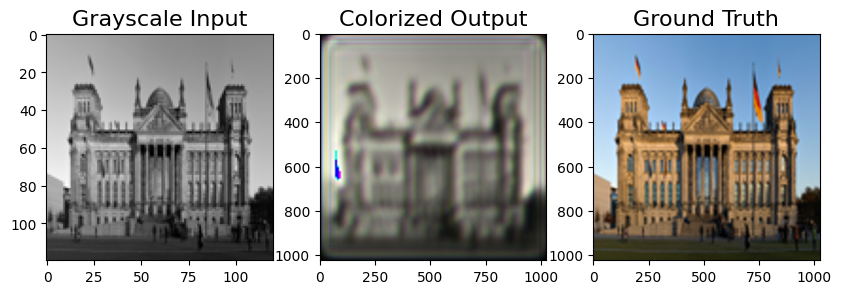

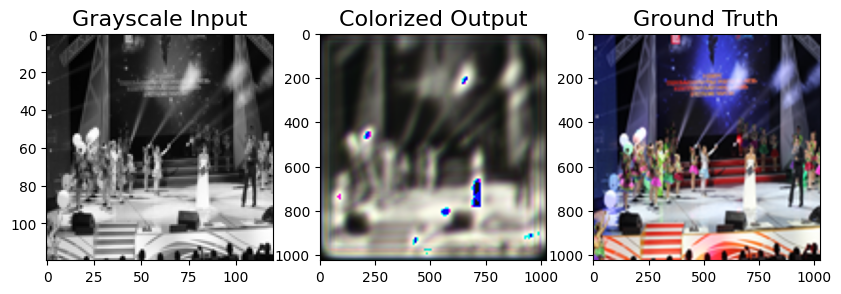

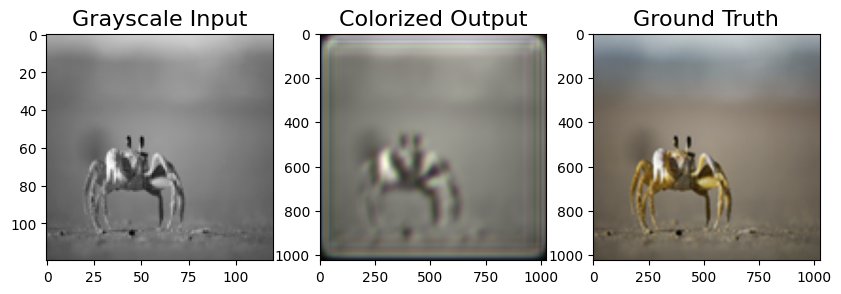

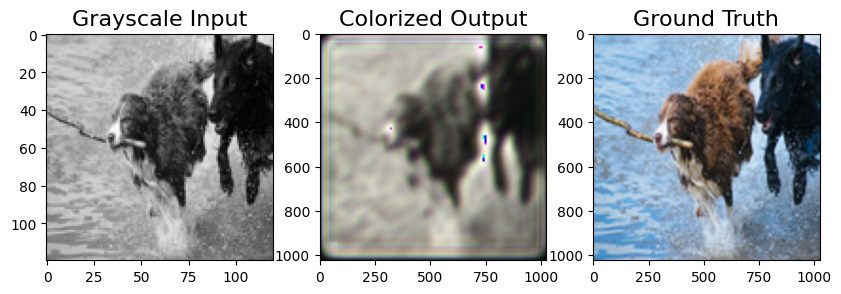

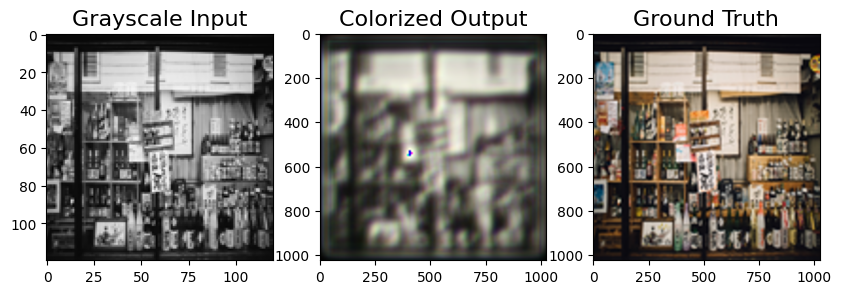

In [33]:
for i in range(len(test_x)):
  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  or_image.set_title('Grayscale Input', fontsize=16)
  plt.imshow( test_x[i].reshape((120,120)) , cmap='gray' )

  in_image = plt.subplot(3,3,2)
  image = Image.fromarray((y[i] * 255).astype('uint8')).resize((1024, 1024))

  image = np.asarray( image )
  in_image.set_title('Colorized Output', fontsize=16)
  plt.imshow( image )

  ou_image = plt.subplot(3,3,3)
  image = Image.fromarray( ( test_y[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  ou_image.set_title('Ground Truth', fontsize=16)
  plt.imshow( image )

  plt.show()


Therefore, the overwhelming reslts depicts the power of GANs and the disruption which can be broght through them.